# Categorical D type
เป็นการแบ่งข้อมูลออกเป็นช่วงๆ เช่นกระบอกเงินเดือน น้อยกว่า 1 หมื่น 15000-30000 อะไรแบบนี้
หรือว่าจะทำกับปีก็ได้เช่นระหว่าง 1 ปี น้อยกว่า 1 ปี สองปี ถึง สามปี โดยการใช้ `pd.cut()`

In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('staff.csv',
                index_col='empID',
                thousands=',', parse_dates=['dob', 'join_date'])

## ตัวเลข

In [28]:
df

,fname,lname,sex,dob,position,department,salary,join_date
empID,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 604 to 724
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fname       12 non-null     object        
 1   lname       12 non-null     object        
 2   sex         12 non-null     object        
 3   dob         12 non-null     datetime64[ns]
 4   position    12 non-null     object        
 5   department  12 non-null     object        
 6   salary      12 non-null     int64         
 7   join_date   12 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 864.0+ bytes


In [30]:
#สร้างกระบอกเงินเดือนขึ้นมาก่อนตรงนี้จะเป็นแค่ตอนเอาไปแสดงผล
from pandas.api.types import CategoricalDtype
salary_bucket = ['0-15000','15001-30,000','30,001-50,000','50001-80000','80,000+']
df['salary_group'] = pd.cut(df.salary,
                           bins=[0,15000, 30000, 50000, 80000, np.inf],
                           labels = salary_bucket,
                           right = 'True').astype(CategoricalDtype(salary_bucket, ordered=True))

- `bin=[0,15000, 30000, 50000, 80000, np.inf]`จะหมายถึงการแบ่งเป็นช่วง ส่วน np.inf หมายถึงมากกว่า 80000 ขึ้นไป
- `labels` จะก็บอกเอาไปมาจาก salary bucket
- `right` = true หมายถึงจะเอาค่าตั้งแต่ 0-15000 แต่ถ้า **false จะไปเอาแค่ 0-14999 แทน**

<Axes: >

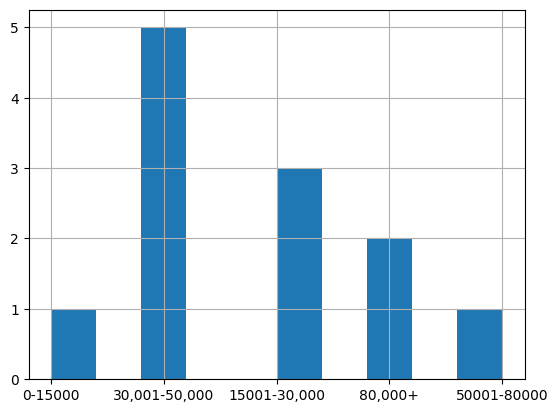

In [31]:
df['salary_group'].hist()

## เวลา

In [32]:
pd.to_datetime('today').year

2024

In [33]:
df['age']= pd.to_datetime('today').year - df.dob.dt.year

In [34]:
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group,age
empID,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,0-15000,30
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-50,000",56
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15001-30,000",37
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-50,000",33
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"80,000+",50
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-50,000",49
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-50,000",61
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15001-30,000",41
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-50,000",37


In [35]:
#สร้างกระบอกเงินเดือนขึ้นมาก่อนตรงนี้จะเป็นแค่ตอนเอาไปแสดงผล
from pandas.api.types import CategoricalDtype
time_frame = ['18-25','26-30','31-40','41-50','50+']
df['age_group'] = pd.cut(df.age,
                           bins=[18,25, 30, 40, 50, np.inf],
                           labels = time_frame,
                           right = 'True').astype(CategoricalDtype(time_frame, ordered=True))

In [36]:
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group,age,age_group
empID,,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,0-15000,30,26-30
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-50,000",56,50+
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15001-30,000",37,31-40
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-50,000",33,31-40
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"80,000+",50,41-50
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-50,000",49,41-50
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-50,000",61,50+
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15001-30,000",41,41-50
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-50,000",37,31-40


<Axes: >

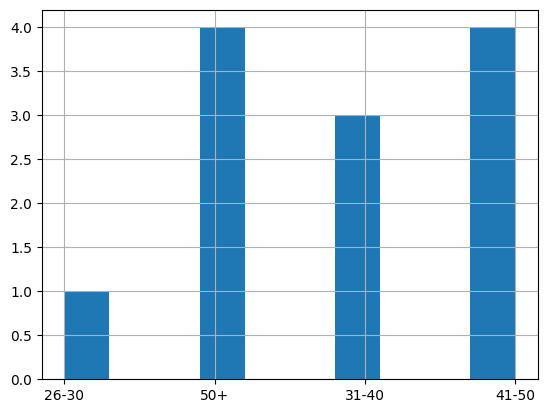

In [37]:
df.age_group.hist()